Import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
# Read CSV file
path="/content/drive/MyDrive/DataSet/vehicles[1].csv"
df = pd.read_csv(path)



Exploratory Data Analysis(EDA)

In [ ]:
df.sample(6)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
195967,7316883688,https://detroit.craigslist.org/wyn/ctd/d/detro...,detroit metro,https://detroit.craigslist.org,5995,2012.0,chevrolet,malibu,NaN,NaN,...,NaN,sedan,black,https://images.craigslist.org/00w0w_b0pp9NwGbU...,2012 Chevrolet Chevy Malibu LTZ 4dr Sedan w/1L...,NaN,mi,42.448610,-83.030200,2021-05-04T15:20:56-0400
385843,7309517821,https://provo.craigslist.org/cto/d/fort-duches...,provo / orem,https://provo.craigslist.org,12500,2013.0,ford,f-150,good,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00S0S_8TyVv3wcSK...,Well maintained 2013 Ford F150. Truck has a r...,NaN,ut,40.310200,-110.010800,2021-04-19T15:57:42-0600
288176,7303823512,https://akroncanton.craigslist.org/ctd/d/akron...,akron / canton,https://akroncanton.craigslist.org,15900,2013.0,dodge,durango,NaN,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00K0K_1chPN41VZ0...,2013 Dodge Durango Crew Offered by: IOA FI...,NaN,oh,40.980404,-81.494766,2021-04-08T15:55:37-0400
197610,7314894867,https://detroit.craigslist.org/mcb/ctd/d/mount...,detroit metro,https://detroit.craigslist.org,17995,2014.0,dodge,grand caravan rt,excellent,6 cylinders,...,mid-size,mini-van,black,https://images.craigslist.org/00C0C_75ktbbkYVL...,2014 Dodge Grand Caravan RT- *AMS Handicap Acc...,NaN,mi,42.628953,-82.861151,2021-04-30T13:26:31-0400
67569,7311676055,https://ventura.craigslist.org/ctd/d/newbury-p...,ventura county,https://ventura.craigslist.org,8995,2013.0,honda,insight,NaN,NaN,...,compact,hatchback,black,https://images.craigslist.org/00t0t_aO0HbNVJBe...,2013 Honda Insight EX Offered by: Regan Mo...,NaN,ca,34.183510,-118.908090,2021-04-23T17:52:36-0700
269766,7316972536,https://hudsonvalley.craigslist.org/ctd/d/king...,hudson valley,https://hudsonvalley.craigslist.org,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,...,NaN,other,black,https://images.craigslist.org/00p0p_lkLK4eRw5b...,Carvana is the safer way to buy a car During t...,NaN,ny,41.930000,-73.990000,2021-05-04T18:01:16-0400


In [ ]:
df.shape


(426880, 26)

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Check Total Missing Values

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

DATA CLEANING

In [ ]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)


In [ ]:
#Handling Missing Values
df.isna().sum()/df.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

In [ ]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

For all missing values converted "unknown"

In [ ]:
df.fillna('unknown', inplace=True)

Handling duplicate Values

In [ ]:
df.duplicated().sum()

53043

In [ ]:
df.shape

(399883, 14)

Categorical  Data Cleaning

In [ ]:
manufacturer_values = df['manufacturer'].value_counts()
print(manufacturer_values)

ford               69597
chevrolet          53501
toyota             33532
honda              20912
nissan             18699
jeep               18673
ram                17261
gmc                16400
bmw                14494
dodge              13280
mercedes-benz      11474
hyundai            10163
subaru              9384
volkswagen          9167
kia                 8310
lexus               8082
audi                7487
cadillac            6798
acura               5908
chrysler            5906
buick               5398
mazda               5337
infiniti            4744
lincoln             4136
mitsubishi          3265
volvo               3262
mini                2353
pontiac             2237
jaguar              1916
rover               1787
porsche             1342
mercury             1165
saturn              1061
alfa-romeo           892
tesla                850
fiat                 785
harley-davidson      141
ferrari               77
datsun                62
aston-martin          24


In [ ]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [ ]:
region_values = df['region'].value_counts()
df['region'] = df['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [ ]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')
for i in df.columns:
  print(i, len(df[i].value_counts().index))

region 51
price 15274
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


NUMERICAL DATA CLEANING

In [ ]:
df.describe()

,price,year,odometer
count,3.998830e+05,399883.000000,3.998830e+05
mean,6.273112e+04,2011.650113,9.617087e+04
std,1.130055e+07,8.575114,1.898250e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2009.000000,3.819350e+04
50%,1.399500e+04,2014.000000,8.573900e+04
75%,2.659000e+04,2017.000000,1.330080e+05
max,3.736929e+09,2022.000000,1.000000e+07


This data has many outliners this may reduce the accuracy of model so detect the outliner and remove them

In [ ]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)
new_df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)
new_df = new_df[(new_df['odometer'] < odometer_upper_limit) & (new_df['odometer'] > odometer_lower_limit)]
new_df.shape

(315661, 14)

FEATURE ENGINEERING

In [ ]:
new_df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
331377,others,24590,2013.0,gmc,others,good,8 cylinders,other,80318.0,clean,other,unknown,pickup,unknown
95723,others,43990,2013.0,bmw,others,good,unknown,other,28094.0,clean,other,rwd,coupe,silver
30453,others,11500,2008.0,mercedes-benz,others,unknown,unknown,gas,87000.0,clean,automatic,unknown,unknown,unknown
329410,others,34500,2017.0,ford,f-150,unknown,unknown,gas,18000.0,clean,automatic,unknown,unknown,black
195614,others,17995,2015.0,cadillac,others,unknown,unknown,gas,72298.0,clean,automatic,unknown,unknown,unknown


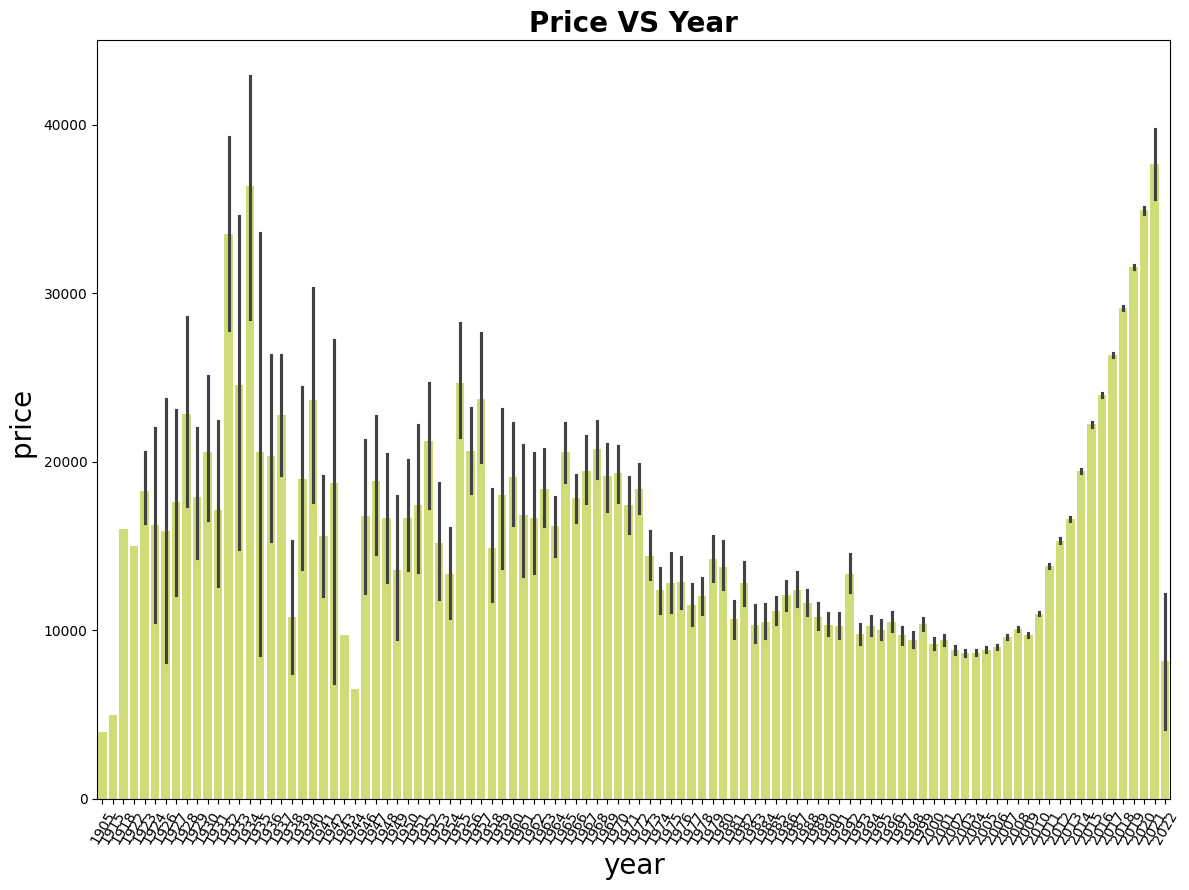

In [ ]:
new_df['odometer'] = new_df['odometer'].astype(int)
new_df['year'] = new_df['year'].astype(int)
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['price'],x=new_df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

Remove cars before 2000 as they are not required

In [ ]:
#Remove cars before 2000 as the are not required
new_df = new_df[new_df['year'] > 2000]
new_df.shape

(300756, 14)

In [ ]:
new_df['car_age'] = 2022 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)
new_df.describe()

<ipython-input-22-0822ee8b3b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['car_age'] = 2022 - new_df['year']
<ipython-input-22-0822ee8b3b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['year'], axis = 1, inplace = True)


,price,odometer,car_age
count,300756.000000,300756.000000,300756.000000
mean,19321.863943,91884.141018,8.951801
std,12025.825617,56185.299687,4.588994
min,3381.000000,7392.000000,0.000000
25%,8995.000000,42247.000000,5.000000
50%,16900.000000,87888.000000,8.000000
75%,27900.000000,131294.250000,12.000000
max,57460.000000,275139.000000,21.000000


DATA VISUALIZATION

In [ ]:
sample_data = new_df.sample(600)

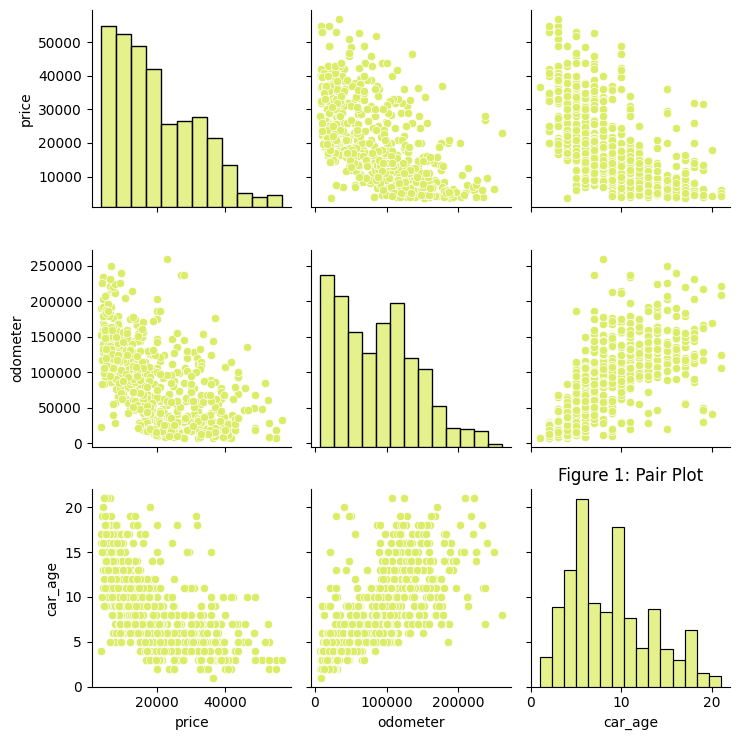

In [ ]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

<ipython-input-25-a4ff67bfeb7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<Axes: >

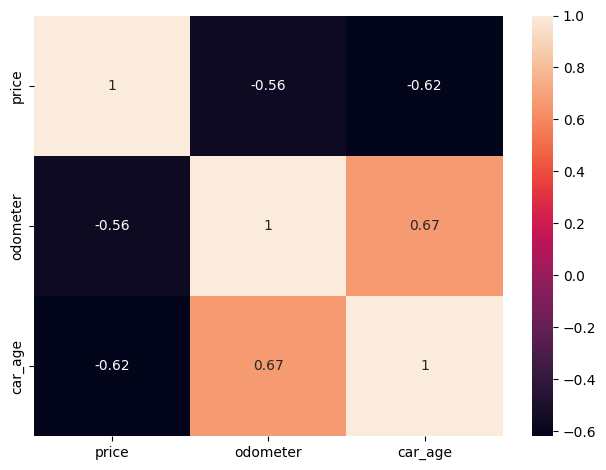

In [ ]:
sns.heatmap(new_df.corr(), annot=True)

<ipython-input-26-db5b21fa630e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.price)


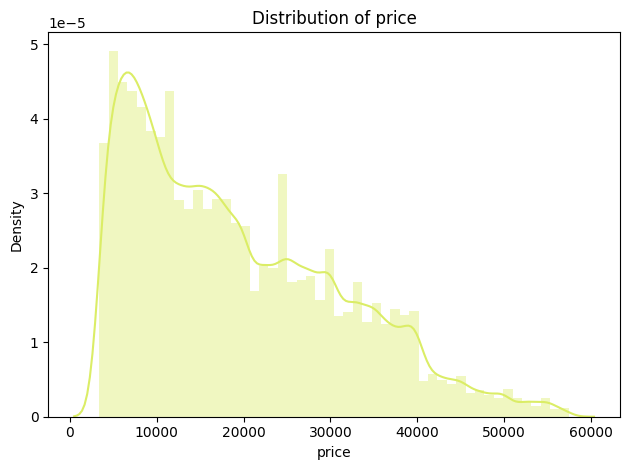

In [ ]:
sns.distplot(new_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

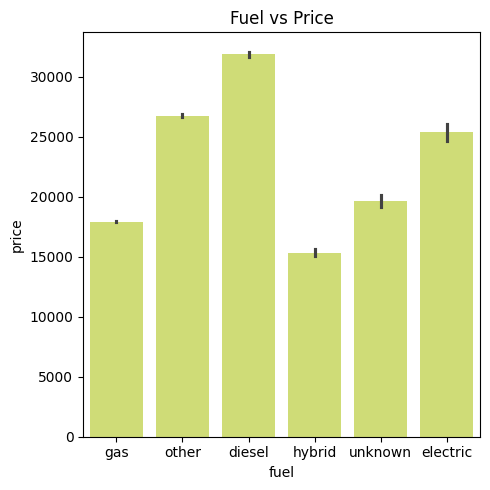

In [ ]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=new_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

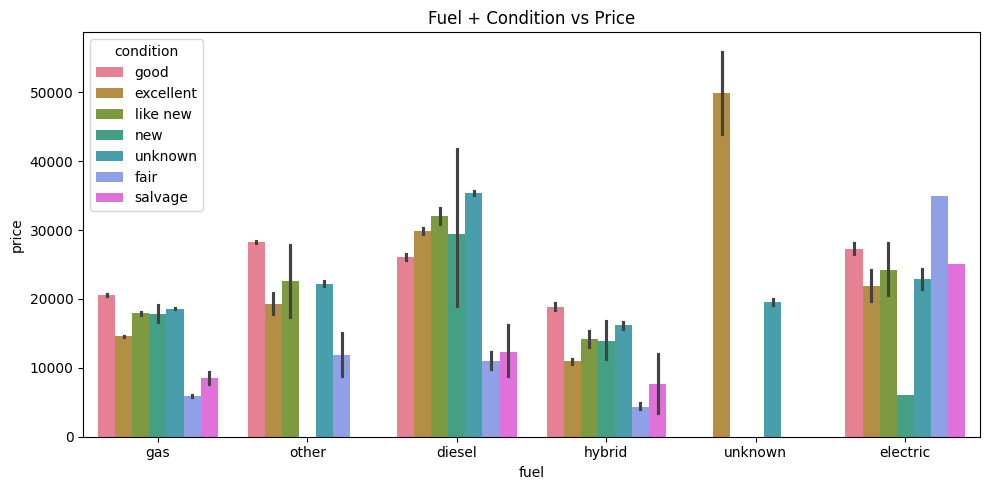

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=new_df)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

DATA PREPROCESSING

In [ ]:
new_df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [ ]:
final_df = new_df.copy()

In [ ]:
#create encoder
from sklearn.pipeline import Pipeline
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)
column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)
X_train_tnf = column_transformer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_tnf = column_transformer.transform(X_test)

In [ ]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(240604, 172)
(60152, 172)


MODEL TRAINING

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))

    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

LINEAR REGRESSION

In [ ]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.6580
Mean squared error:  49143641.36
Mean absolute error:  5305.39
Root mean squared error:  7010.25


KNN

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_tnf, y_train)
y_pred = KNN.predict(X_test_tnf)
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.8106
Mean squared error:  27217438.87
Mean absolute error:  3134.76
Root mean squared error:  5217.03


XGBOOST REGRESSOR

In [ ]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
XGB.fit(X_train_tnf, y_train)
y_pred = XGB.predict(X_test_tnf)
score_xgb = result(y_test, y_pred)
score_data['XGBoost Regressor'] = score_xgb
print('R2 score: ', score_xgb[0])
print('Mean squared error: ', score_xgb[2])
print('Mean absolute error: ', score_xgb[3])
print('Root mean squared error: ', score_xgb[4])

R2 score:  0.8617
Mean squared error:  19868450.97
Mean absolute error:  2239.62
Root mean squared error:  4457.40


DECISION TREE REGRESSOR

In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train_tnf, y_train)
y_pred = DTR.predict(X_test_tnf)
score_dtr = result(y_test, y_pred)
score_data['Decision Tree Regressor'] = score_dtr
print('R2 score: ', score_dtr[0])
print('Mean squared error: ', score_dtr[2])
print('Mean absolute error: ', score_dtr[3])
print('Root mean squared error: ', score_dtr[4])

R2 score:  0.7914
Mean squared error:  29970150.97
Mean absolute error:  2560.58
Root mean squared error:  5474.50


OVER ALL RESULT AND MODEL SELECTION

In [ ]:
score_data

,Linear Regression,K-Nearest Neighbour,XGBoost Regressor,Decision Tree Regressor
R2 Score,0.6580,0.8106,0.8617,0.7914
Accuracy(%),65.7952,81.0562,86.1712,79.1403
Mean Squared Error,49143641.36,27217438.87,19868450.97,29970150.97
Mean Absolute Error,5305.39,3134.76,2239.62,2560.58
Root MSE,7010.25,5217.03,4457.40,5474.50


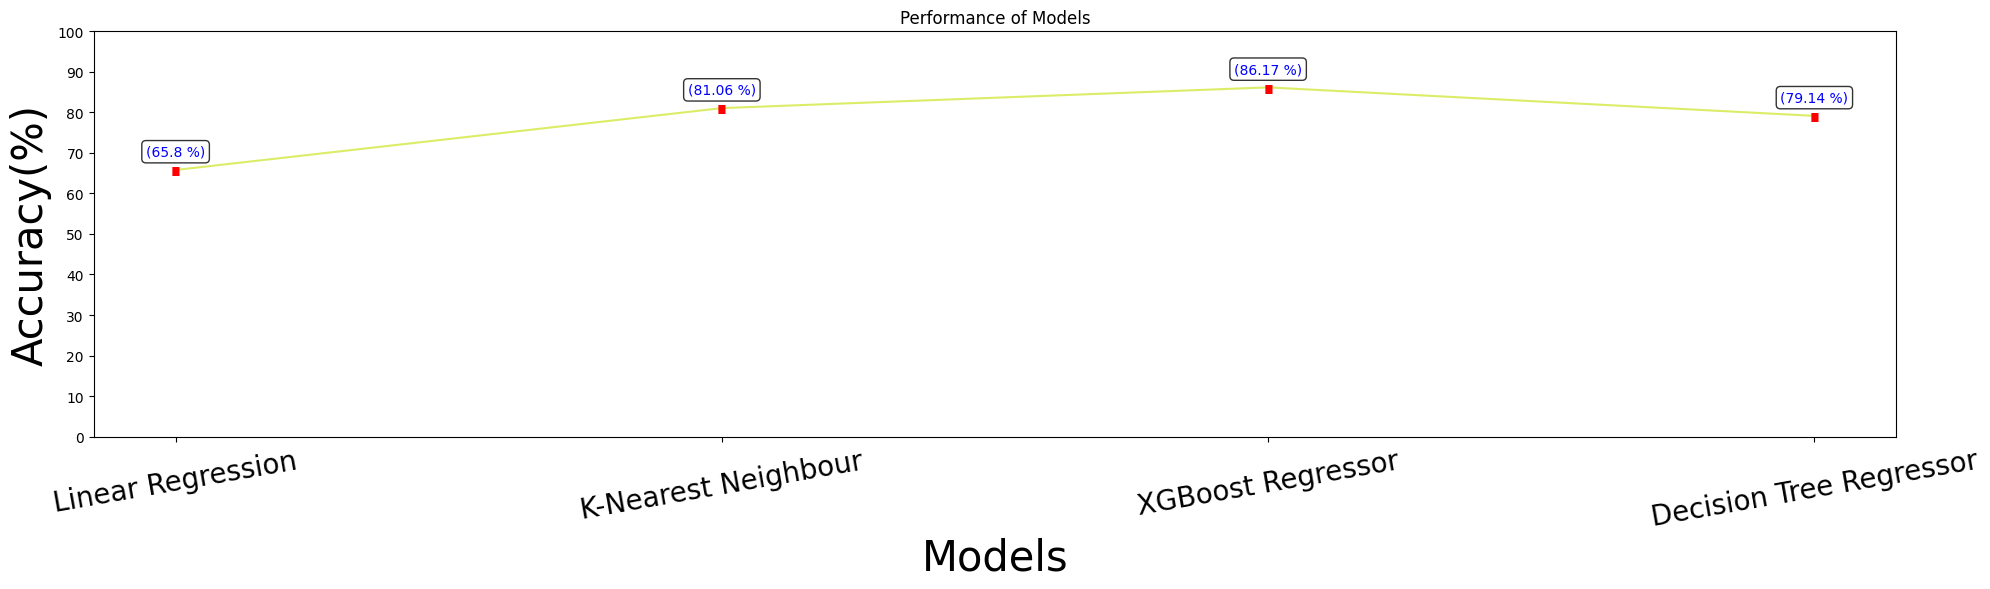

In [ ]:
for i in score_data.columns:
  score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='blue',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

FINAL MODEL ANALYSIS

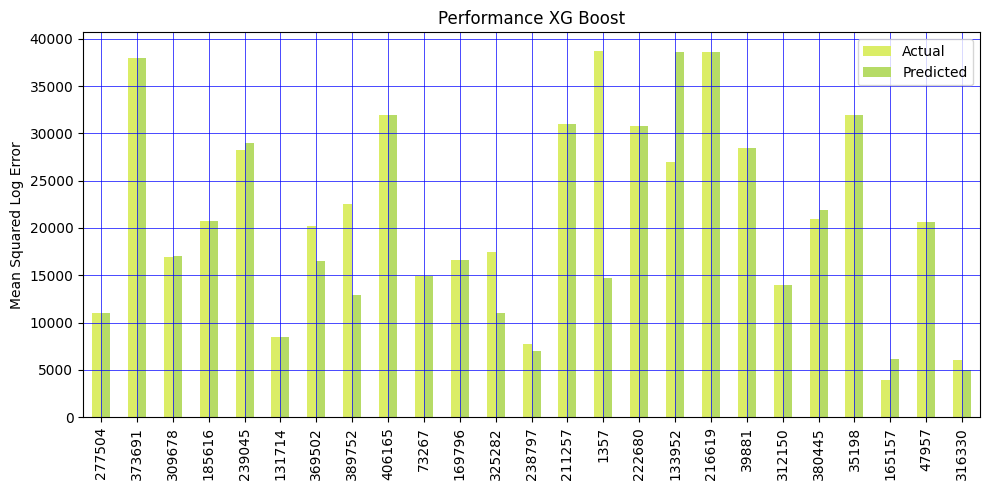

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.title('Performance XG Boost')
plt.ylabel('Mean Squared Log Error')
plt.savefig('XGBoost-Performance.jpg')
plt.show()